# Парсинг, полиномиальная регрессия и визуализация данных

### 1. Парсинг данных

In [3]:
import pandas as pd
import numpy as np

url = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'

for i, df in enumerate(pd.read_html(url)):
    df.to_csv('myfile.csv')

data = pd.read_csv('myfile.csv')
data.head(5)

,Unnamed: 0,0,1
0,0,Год,Количество родившихся чел.
1,1,1959,2 796 228
2,2,1960,2 782 353
3,3,1961,2 662 135
4,4,1962,2 482 539


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  63 non-null     int64 
 1   0           63 non-null     object
 2   1           63 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### 2. Подготовка данных

In [5]:
data = data.iloc[1:] #удаление первой строки
data = data.drop(data.columns[0], axis=1) #удаление первого столбца
data['1'] = data['1'].str.replace(' ', '') #удаление лишних пробелов
data['1'] = data['1'].astype('float') #.astype('int32') #изменение типа данных
data['0'] = data['0'].astype('float') #.astype('int32') #изменение типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       62 non-null     float64
 1   1       62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [6]:
data.head(5)

,0,1
1,1959.0,2796228.0
2,1960.0,2782353.0
3,1961.0,2662135.0
4,1962.0,2482539.0
5,1963.0,2331505.0


### 3. Визуализация данных 

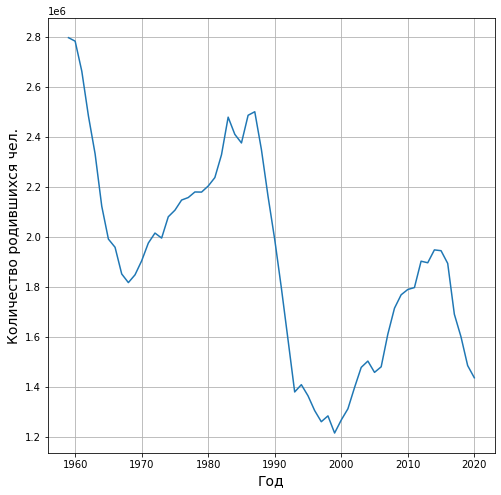

In [7]:
import matplotlib.pyplot as plt

X = data['0']
y = data['1']

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_ylabel('Количество родившихся чел.', fontsize=14)
ax.set_xlabel('Год', fontsize=14)
plt.plot(X, y)
plt.grid()
plt.show()

### 4. Применения полиномиальной регрессии, определение метрик MAE, MSE, RMSE 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

lin_reg.intercept_, lin_reg.coef_

(array([-1.16561445e+11]),
 array([[ 0.00000000e+00,  1.76290356e+08, -8.88616001e+04,
          1.49285957e+01]]))

In [11]:
print('Train MAE:', mean_absolute_error(train_pred, y_train))
print('Test MAE:', mean_absolute_error(test_pred, y_test))

print('Train MSE:', mean_squared_error(train_pred, y_train))
print('Test MSE:', mean_squared_error(test_pred, y_test))

print('Train RMSE:', mean_squared_error(train_pred, y_train) ** 0.5)
print('Test RMSE:', mean_squared_error(test_pred, y_test) ** 0.5)

Train MAE: 273418.6410868119
Test MAE: 224105.48570486216
Train MSE: 97614469407.35942
Test MSE: 72423092653.99106
Train RMSE: 312433.14390019415
Test RMSE: 269115.3891065895


### 5. Визуализация полиномиальной регрессии

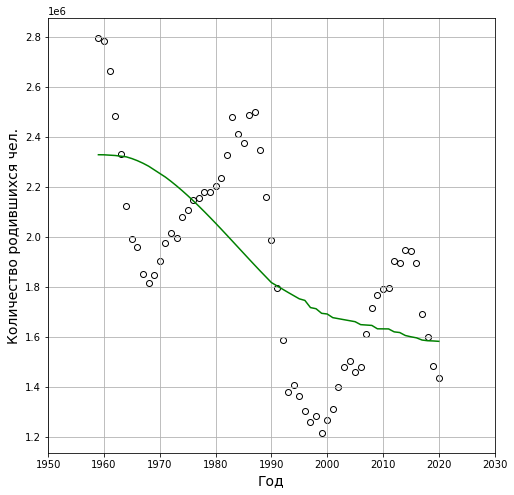

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(X, y, edgecolor='k', facecolor='white')
plt.plot(np.sort(X_train, axis = 0)[::-1], np.sort(train_pred, axis = 0), color='green')
ax.set_ylabel('Количество родившихся чел.', fontsize=14)
ax.set_xlabel('Год', fontsize=14)
plt.xlim (1950, 2030)
plt.grid()
plt.show()